# Sklearn implementation of the real ip discrete op decision tree classifier

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# from latexify import latexify, format_axes

In [3]:
dataset = """Day,Temperature,PlayTennis
            D1,40,No
            D2,48,No
            D3,60,Yes
            D4,72,Yes
            D5,80,Yes
            D6,90,No"""

f = StringIO(dataset)        # StringIO is a class in Python that allows you to treat a string as a file. It provides a way to read and write strings as if they were files.
df = pd.read_csv(f, sep=",")

In [4]:
df

,Day,Temperature,PlayTennis
0,D1,40,No
1,D2,48,No
2,D3,60,Yes
3,D4,72,Yes
4,D5,80,Yes
5,D6,90,No


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)

X = df[['Temperature']]
y = df['PlayTennis']

dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [10]:
# Function to strore the decision tree's graphviz representation as pdf
def save_decision_tree_as_pdf(dt, feature_names, class_names, filename):
    dot_data = export_graphviz(dt, out_file=None, feature_names=feature_names, class_names=class_names,
                                filled=True, rounded=True, special_characters=True)
    
    graph = graphviz.Source(dot_data)
    graph.render(filename, format='png')
    
save_decision_tree_as_pdf(dt, ['Temperature'], ['No', 'Yes'], '../Datasets/images/real-ip-1')

In [12]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)

dt2.fit(X, y)
save_decision_tree_as_pdf(dt2, ['Temperature'], ['No', 'Yes'], '../Datasets/images/real-ip-2')

Text(0, 0.5, 'x2')

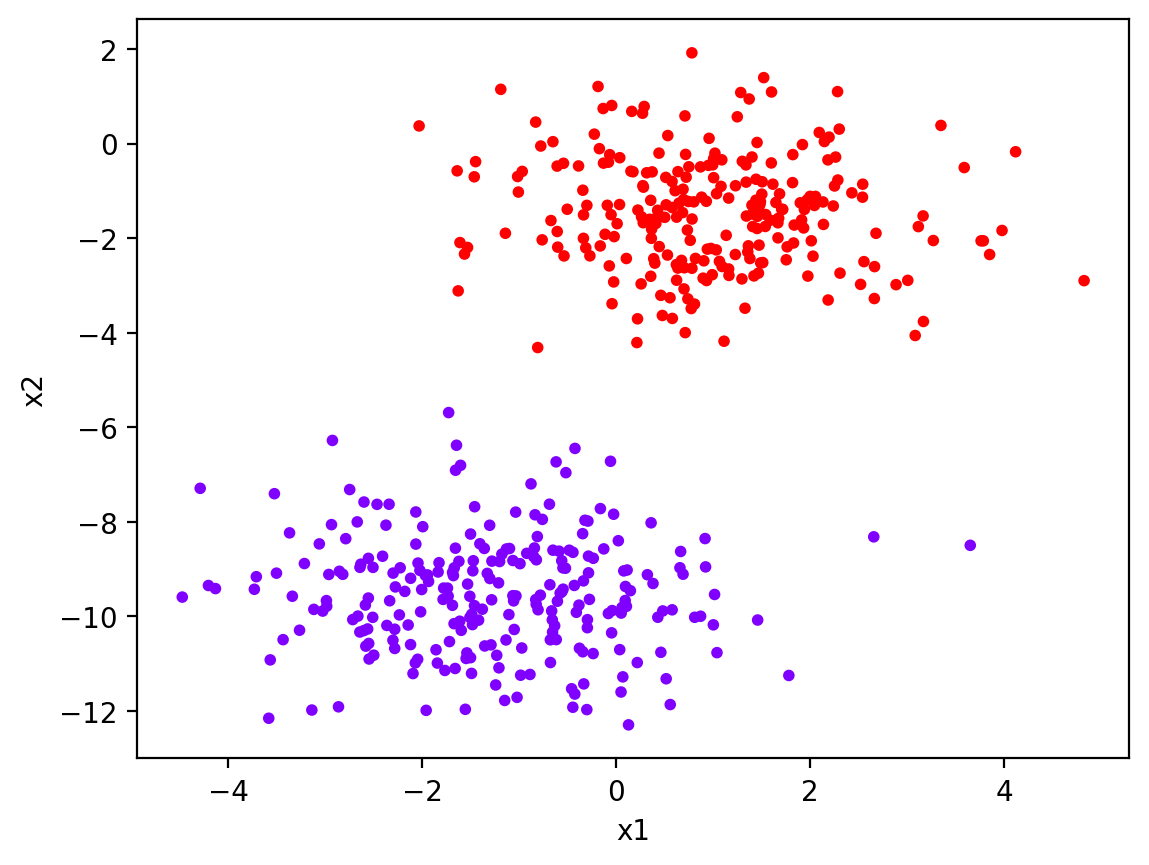

In [23]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=2,
                  random_state=2, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow')
# format_axes(plt.gca())
plt.xlabel("x1")
plt.ylabel("x2")

In [24]:
y

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [25]:
def visualize_tree(depth, X, y, ax=None, cmap='rainbow'):
    model = DecisionTreeClassifier(max_depth=depth)
    ax = ax or plt.gca()
    print(f"model :{model}, depth :{depth}")
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    # format_axes(plt.gca())
    plt.xlabel("x1")
    plt.ylabel("x2")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(xlim)
    print(ylim)

    print(*xlim)
    print(*ylim)
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.2,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    plt.savefig(f"../Datasets/images/real_ip_dis_op_depth-{depth}.png", bbox_inches="tight")
    plt.clf()

In [26]:
for depth in range(1, 5):
    visualize_tree(depth, X, y)

model :DecisionTreeClassifier(max_depth=1), depth :1
(-4.93618992273855, 5.288279671467109)
(-13.00459019898351, 2.632811940526929)
-4.93618992273855 5.288279671467109
-13.00459019898351 2.632811940526929


C:\Users\ADITI\AppData\Local\Temp\ipykernel_10848\288603609.py:29: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


model :DecisionTreeClassifier(max_depth=2), depth :2
(-4.93618992273855, 5.288279671467109)
(-13.00459019898351, 2.632811940526929)
-4.93618992273855 5.288279671467109
-13.00459019898351 2.632811940526929


C:\Users\ADITI\AppData\Local\Temp\ipykernel_10848\288603609.py:29: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


model :DecisionTreeClassifier(max_depth=3), depth :3
(-4.93618992273855, 5.288279671467109)
(-13.00459019898351, 2.632811940526929)
-4.93618992273855 5.288279671467109
-13.00459019898351 2.632811940526929


C:\Users\ADITI\AppData\Local\Temp\ipykernel_10848\288603609.py:29: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


model :DecisionTreeClassifier(max_depth=4), depth :4
(-4.93618992273855, 5.288279671467109)
(-13.00459019898351, 2.632811940526929)
-4.93618992273855 5.288279671467109
-13.00459019898351 2.632811940526929


C:\Users\ADITI\AppData\Local\Temp\ipykernel_10848\288603609.py:29: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


<Figure size 640x480 with 0 Axes>